<center><h1><b><font color="#947">Курсовой проект на тему "Разработка экспертной системы"</font></b></h1></center>

<h3><p><font color="#667">Спойлер: для выбора <b>видеокарт.</b></font></p></h3>
<center><img src="https://images.bit-tech.net/content_images/2017/03/nvidia-geforce-gtx-1080-ti-review/1080tife-1b.jpg" width="192" heigh="108"><img src="https://www.litera-l.ru/image/cache/catalog/parts/video-cards/msi_gtx_960_gaming_2g_2-900x700.jpg" width="180" heigh="140"><img src="https://wizardmsk.ru/image/catalog/data/Videokarta_VCQM6000-24GB-PB__QUADROM600024GBPCIEX16_GEN3_RTL.jpg" width="175" heigh="148"></center>
<h4><font color="#865">Но не абы как, а по 5 важным входным параметрам:</font>
    <ul>
    <li><font color="#949">Цена (в рублях)</font></li>
    <li><font color="#845">Частота видеопамяти (в МГц)</font></li>
    <li><font color="#741">Максимальная пропускная способность (в Гб/с)</font></li>
    <li><font color="#645">Объём видеопамяти</font></li>
    <li><font color="#547">Ширина шины</font></li>
</ul></h4>

<h4><font color="#480">Для начала необходимо произвести import необходимых модулей:</font>
<ul>
    <li><font color="#980">numpy - для модуля scikit-fuzzy, который работает именно с numpy</font></li>
    <li><font color="#783">skfuzzy - собственно сам модуль scikit-fuzzy, который используется для вычисления нечётких систем</font></li>
    <li><font color="#586">matplotlib.pyplot - модуль для построения графиков</font></li>
    <li><font color="#389">skfuzzy.control - модуль для создания входных/выходных нечётких данных и правил для нечёткой системы</font></li>
</ul></h4>

In [222]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

<h4><font color="#585">Далее создаются входные и выходные нечёткие данные, которым задаётся диапазон и специальная метка, которая будет передаваться в будущем при вводе значений в систему: </font>
<ul><font color="#197">Входные данные:</font>
    <li><font color="#386">частота видеопамяти: 900-2501 Мгц</font></li>
    <li><font color="#278">цена: 4000-72000 рублей</font></li>
    <li><font color="#465">максимальная пропускная способность: 12-624 Гб/с</font></li>
    <li><font color="#653">объём видеопамяти: 2-16 Гб</font></li>
    <li><font color="#744">ширина шины: 64-256 бит</font></li>
</ul>
    <ul><font color="#187">Выходные данные: </font>
        <li><font color="#891">значение уровня видеокарты: 0-10</font></li>
    </ul>
</h4>

In [223]:
# Частота видеопамяти (МГц)
videoMemoryFreq = ctrl.Antecedent(np.arange(900, 2521, 1), 'freq')
# Цена видеокарты
cost = ctrl.Antecedent(np.arange(4000, 72001, 1), 'cost')
# Максимальная пропускная способность (Гб/с)
maxPropSposob = ctrl.Antecedent(np.arange(12, 625, 1), 'MPS')
# Объём видеопамяти (ГБ)
volumeVideoMemory = ctrl.Antecedent(np.arange(2, 17, 1), 'VVM')
# Ширина шины (бит)
shinaWidth = ctrl.Antecedent(np.arange(64, 257, 1), 'shina')
# Выходное значение видеокарты
outputNum = ctrl.Consequent(np.arange(0, 11, 0.1), 'perf')

<h4><font color="#466">Создание массивов со значениями цен выбранных видеокарт для различных диапазонов выходных значений и реализация функции для поиска необходимой модели</font><br></h4>

In [224]:
costInVeryLow = [4599, 6799, 7699, 9299, 10399, 22999]
costInLow = [13999, 15999, 21999, 47499]
costInMedium = [18999, 27199, 31499, 38999, 24599, 29399, 30499, 34299, 53999]
costInBig = [49999, 37999, 45299, 48499]
costInVeryBig = [43999, 56999, 62999, 67999, 71999, 40999, 61999, 64999, 69999]
# Функция для поиска значения из массива arrayNum, близкого к num
def closestNum(num, arrayNum):
    minDiff = 9999999
    closest = None
    for number in arrayNum:
        diff = abs(num - number)
        if diff < minDiff:
            minDiff = diff
            closest = number
    return closest
# Функция для поиска модели, наиболее подходящей для выходного параметра outNum и цены price
def searchModel(outNum, price):
    necessaryPrice = None
    outStr = "Рекомендуемая видеокарта: "
    if outNum <= 2:
        necessaryPrice = closestNum(price, costInVeryLow)
        if necessaryPrice == costInVeryLow[0]:
            outStr += "MSI GeForce GT 730 Silent LP"
        elif necessaryPrice == costInVeryLow[1]:
            outStr += "GIGABYTE GeForce GT 1030 Low Profile D4 2G"
        elif necessaryPrice == costInVeryLow[2]:
            outStr += "Palit GeForce GT 1030"
        elif necessaryPrice == costInVeryLow[3]:
            outStr += "ZOTAC GeForce GT 1030 LP"
        elif necessaryPrice == costInVeryLow[4]:
            outStr += "ASUS GeForce GT 1030 Silent LP"
        else:
            outStr += "PNY Quadro T400"
    elif (outNum > 2) and (outNum <= 3.75):
        necessaryPrice = closestNum(price, costInLow)
        if necessaryPrice == costInLow[0]:
            outStr += "ASRock Intel Arc A380 Challenger ITX OC"
        elif necessaryPrice == costInLow[1]:
            outStr += "MSI GeForce GTX 1650 D6 VENTUS XS OCV3"
        elif necessaryPrice == costInLow[2]:
            outStr += "MSI GeForce RTX 3050 VENTUS 2X OC"
        else:
            outStr += "PNY Quadro T1000" 
    elif (outNum > 3.75) and (outNum <= 6.25):
        necessaryPrice = closestNum(price, costInMedium)
        if necessaryPrice == costInMedium[0]:
            outStr += "ASUS GeForce GTX 1650 Dual EVO OC Edition"
        elif necessaryPrice == costInMedium[1]:
            outStr += "Sapphire AMD Radeon RX 6600 PULSE"
        elif necessaryPrice == costInMedium[2]:
            outStr += "Acer AMD Radeon RX 7600 Predator BiFrost OC"
        elif necessaryPrice == costInMedium[3]:
            outStr += "MSI GeForce RTX 4060 GAMING X"
        elif necessaryPrice == costInMedium[4]:
            outStr += "ASUS GeForce GTX 1650 TUF Gaming OC Edition"
        elif necessaryPrice == costInMedium[5]:
            outStr += "MSI AMD Radeon RX 6650 XT MECH 2X OC"
        elif necessaryPrice == costInMedium[6]:
            outStr += "ASUS AMD Radeon RX 7600 DUAL OC V2"
        elif necessaryPrice == costInMedium[7]:
            outStr += "GIGABYTE AMD Radeon RX 7600 GAMING OC"
        else:
            outStr += "ASRock AMD Radeon RX 5500 XT Challenger D OC"
    elif (outNum > 6.25) and (outNum <= 8):
        necessaryPrice = closestNum(price, costInBig)
        if necessaryPrice == costInBig[0]:
            outStr += "MSI GeForce RTX 4060 Ti VENTUS 3X OC"
        elif necessaryPrice == costInBig[1]:
            outStr += "ASRock Intel Arc A770 Phantom Gaming D OC"
        elif necessaryPrice == costInBig[2]:
            outStr += "ASRock AMD Radeon RX 7600 XT Steel Legend OC"
        else:
            outStr += "Palit GeForce RTX 4060 Ti Dual OC"
    else:
        necessaryPrice = closestNum(price, costInVeryBig)
        if necessaryPrice == costInVeryBig[0]:
            outStr += "Sapphire AMD Radeon RX 6700 XT PULSE"
        elif necessaryPrice == costInVeryBig[1]:
            outStr += "ASUS AMD Radeon RX 7700 XT TUF Gaming OC Edition"
        elif necessaryPrice == costInVeryBig[2]:
            outStr += "PowerColor AMD Radeon RX 7800 XT Fighter"
        elif necessaryPrice == costInVeryBig[3]:
            outStr += "MSI GeForce RTX 4070 VENTUS 2X WHITE OC"
        elif necessaryPrice == costInVeryBig[4]:
            outStr += "Palit GeForce RTX 4070 JetStream"
        elif necessaryPrice == costInVeryBig[5]:
            outStr += "PowerColor AMD Radeon RX 6700 XT Fighter"
        elif necessaryPrice == costInVeryBig[6]:
            outStr += "ASRock AMD Radeon RX 6800 XT Phantom Gaming OC"
        elif necessaryPrice == costInVeryBig[7]:
            outStr += "PowerColor AMD Radeon RX 7800 XT Hellhound"
        else:
            outStr += "Sapphire AMD Radeon RX 7900 GRE PURE GAMING OC"
    print(outStr + f" за {necessaryPrice} рублей")
        


<h4><font color="#876">Таблица с характеристиками видеокартами представлена ниже: </font></h4>
<center><img src="table.png" width="800" heigh="800"></center>

<h4><font color="#687">С помощью функции trimf создаются треугольные функции принадлежности, где<br>
<ul><font color="#836">первое значение - начало треугольника (значение ФП равно 0.0)</font><br>
<font color="#657">второе значение - середина треугольника (значение ФП равно 1.0)</font><br>
<font color="#874">третье значение - конец треугольника (значение ФП равно 0.0)</font></ul></font></h4>

In [225]:
# Частота видеопамяти
videoMemoryFreq['low'] = fuzz.trimf(videoMemoryFreq.universe, [900, 900, 2000])
videoMemoryFreq['medium'] = fuzz.trimf(videoMemoryFreq.universe, [900, 2100, 2520])
videoMemoryFreq['high'] = fuzz.trimf(videoMemoryFreq.universe, [2100, 2520, 2520])
# Цена видеокарты
cost['low'] = fuzz.trimf(cost.universe, [4000, 4000, 46000])
cost['medium'] = fuzz.trimf(cost.universe, [4000, 46000, 72000])
cost['high'] = fuzz.trimf(cost.universe, [46000, 72000, 72000])
# Максимальная пропускная способность
maxPropSposob['low'] = fuzz.trimf(maxPropSposob.universe, [12, 12, 288])
maxPropSposob['medium'] = fuzz.trimf(maxPropSposob.universe, [12, 288, 624])
maxPropSposob['high'] = fuzz.trimf(maxPropSposob.universe, [288, 624, 624])
# Объём видеопамяти
volumeVideoMemory['low'] = fuzz.trimf(volumeVideoMemory.universe, [2, 2, 8])
volumeVideoMemory['medium'] = fuzz.trimf(volumeVideoMemory.universe, [2, 8, 16])
volumeVideoMemory['high'] = fuzz.trimf(volumeVideoMemory.universe, [8, 16, 16])
# Ширина шины
shinaWidth['low'] = fuzz.trimf(shinaWidth.universe, [64, 64, 128])
shinaWidth['medium'] = fuzz.trimf(shinaWidth.universe, [64, 128, 256])
shinaWidth['high'] = fuzz.trimf(shinaWidth.universe, [128, 256, 256])
# Выходное значение видеокарты
outputNum['very low'] = fuzz.trimf(outputNum.universe, [0, 0, 2.5])
outputNum['low'] = fuzz.trimf(outputNum.universe, [0, 2.5, 5])
outputNum['medium'] = fuzz.trimf(outputNum.universe, [2.5, 5, 8])
outputNum['big'] = fuzz.trimf(outputNum.universe, [5, 8, 10])
outputNum['very big'] = fuzz.trimf(outputNum.universe, [8, 10, 10])

<center><h2><font color="#a10">Показ графиков функций принадлежностей</font></h2></center>

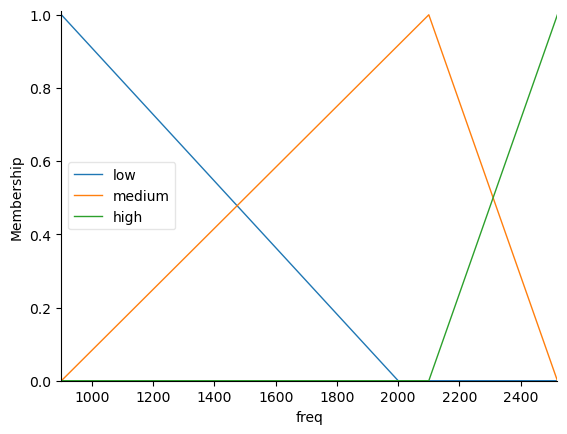

In [226]:
videoMemoryFreq.view()

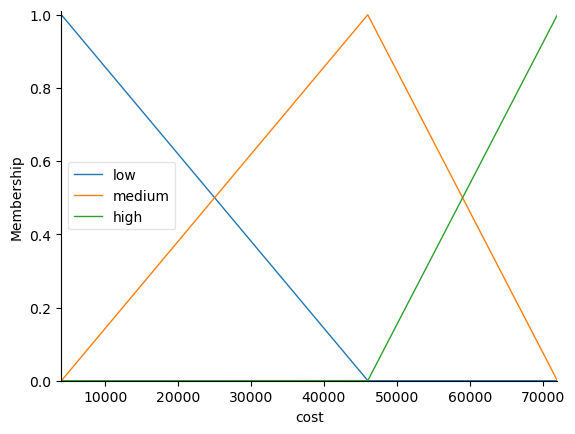

In [227]:
cost.view()

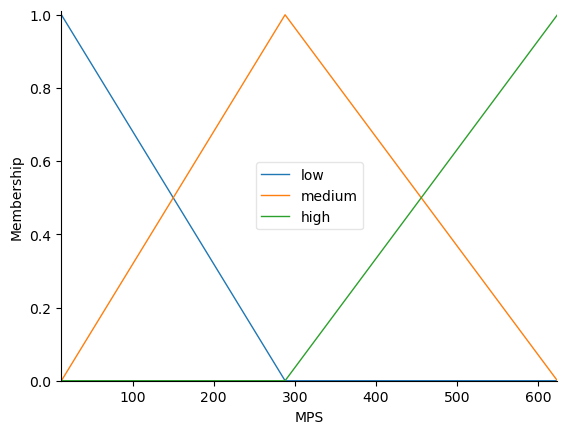

In [228]:
maxPropSposob.view()

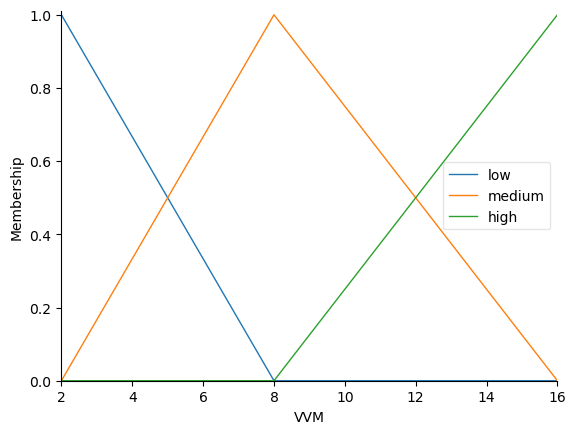

In [229]:
volumeVideoMemory.view()

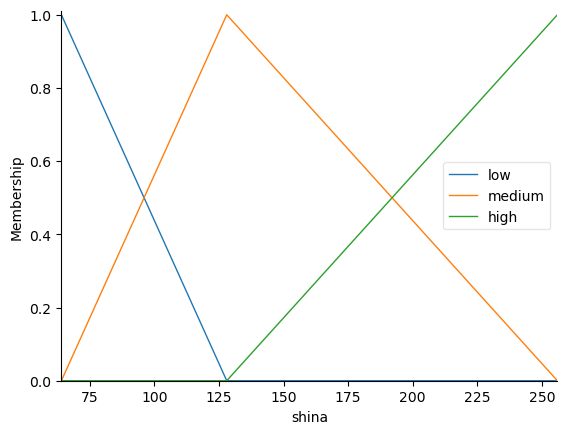

In [230]:
shinaWidth.view()

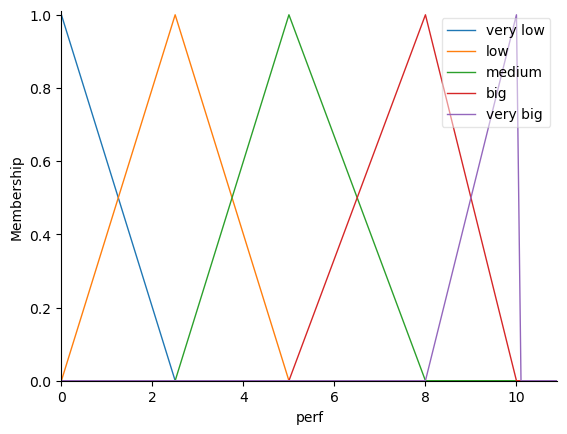

In [232]:
outputNum.view()

<center><h2><font color="#580">Описания правил нечёткой системы</font></h2></center>
<ul><h5><font color="#755">Примечание: в конструктор класса Rule вносятся нечёткие данные различного диапазона и соединяются побитовым И</font></h4></ul>

In [233]:
# Правила нечеткого алгоритма
rule1 = ctrl.Rule(cost['low'] & videoMemoryFreq['low'] & maxPropSposob['low'] & volumeVideoMemory['low'] & shinaWidth['low'], outputNum['very low'])
rule2 = ctrl.Rule(cost['low'] & videoMemoryFreq['medium'] & maxPropSposob['medium'] & volumeVideoMemory['medium'] & shinaWidth['low'], outputNum['low'])
rule3 = ctrl.Rule(cost['low'] & videoMemoryFreq['medium'] & maxPropSposob['medium'] & volumeVideoMemory['low'] & shinaWidth['medium'], outputNum['low'])
rule4 = ctrl.Rule(cost['medium'] & videoMemoryFreq['medium'] & maxPropSposob['medium'] & volumeVideoMemory['medium'] & shinaWidth['medium'], outputNum['medium'])
rule5 = ctrl.Rule(cost['medium'] & videoMemoryFreq['high'] & maxPropSposob['medium'] & volumeVideoMemory['medium'] & shinaWidth['medium'], outputNum['medium'])
rule6 = ctrl.Rule(cost['medium'] & videoMemoryFreq['low'] & maxPropSposob['low'] & volumeVideoMemory['low'] & shinaWidth['low'], outputNum['very low'])
rule7 = ctrl.Rule(cost['medium'] & videoMemoryFreq['medium'] & maxPropSposob['medium'] & volumeVideoMemory['low'] & shinaWidth['medium'], outputNum['medium'])
rule8 = ctrl.Rule(cost['medium'] & videoMemoryFreq['low'] & maxPropSposob['low'] & volumeVideoMemory['medium'] & shinaWidth['low'], outputNum['low'])
rule9 = ctrl.Rule(cost['medium'] & videoMemoryFreq['high'] & maxPropSposob['high'] & volumeVideoMemory['high'] & shinaWidth['high'], outputNum['very big'])
rule10 = ctrl.Rule(cost['high'] & videoMemoryFreq['low'] & maxPropSposob['low'] & volumeVideoMemory['low'] & shinaWidth['medium'], outputNum['low'])
rule11 = ctrl.Rule(cost['high'] & videoMemoryFreq['high'] & maxPropSposob['medium'] & volumeVideoMemory['medium'] & shinaWidth['medium'], outputNum['big'])
rule12 = ctrl.Rule(cost['high'] & videoMemoryFreq['medium'] & maxPropSposob['high'] & volumeVideoMemory['high'] & shinaWidth['high'], outputNum['very big'])
rule13 = ctrl.Rule(cost['high'] & videoMemoryFreq['high'] & maxPropSposob['high'] & volumeVideoMemory['high'] & shinaWidth['high'], outputNum['very big'])
rule14 = ctrl.Rule(cost['medium'] & videoMemoryFreq['medium'] & maxPropSposob['medium'] & volumeVideoMemory['high'] & shinaWidth['high'], outputNum['big'])
rule15 = ctrl.Rule(cost['medium'] & videoMemoryFreq['medium'] & maxPropSposob['high'] & volumeVideoMemory['high'] & shinaWidth['high'], outputNum['big'])
rule16 = ctrl.Rule(cost['high'] & videoMemoryFreq['medium'] & maxPropSposob['medium'] & volumeVideoMemory['medium'] & shinaWidth['medium'], outputNum['medium'])

<center><h2><font color="#a36">Создание нечёткой системы с заданными правилами и симулятора</font></h2></center>

In [234]:
# Создание системы нечеткого вывода и заполнение её правилами
fuzzySystem = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16])
# Создание симулятора для работы со системой
simulation = ctrl.ControlSystemSimulation(fuzzySystem)

<center><h2><font color="#a92">Ввод значений и выполнение этапов нечёткого алгоритма Мамдани</font></h2></center>
<ul><h5><font color="#685">Примечание: функция compute выполняет агрегирование, активизацию и аккумулирование</font></h5></ul>

In [235]:
# Ввод параметров видеокарты
costV = int(input("Введите желаемую стоимость видеокарты (от 4000 до 72000): "))
simulation.input['cost'] = costV
freq = int(input("Введите желаемую частоту видеопамяти (от 900 до 2520): "))
simulation.input['freq'] = freq
mps = int(input("Введите желаемую максимальную пропускную способность видеокарты (от 12 до 624): "))
simulation.input['MPS'] = mps
vvm = int(input("Введите желаемый объём видеопамяти (от 2 до 16): "))
simulation.input['VVM'] = vvm
shina = int(input("Введите желаемую ширину шины видеокарты (от 64 до 256): "))
simulation.input['shina'] = shina
# Вычисление системы
simulation.compute()
# Получение выходного значения
output = simulation.output['perf']
# Выбор модели на основании выходного значения и стоимости
searchModel(output, costV)
#print(output)

Введите желаемую стоимость видеокарты (от 4000 до 72000):  50000
Введите желаемую частоту видеопамяти (от 900 до 2520):  2300
Введите желаемую максимальную пропускную способность видеокарты (от 12 до 624):  280
Введите желаемый объём видеопамяти (от 2 до 16):  8
Введите желаемую ширину шины видеокарты (от 64 до 256):  130


Рекомендуемая видеокарта: ASRock AMD Radeon RX 5500 XT Challenger D OC за 53999 рублей


<center><img src="videoend.png"></center>